In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [2]:
df = pd.read_csv('Sampling-0.0004.csv')

In [3]:
df

,L4_SRC_PORT,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,TCP_FLAGS,CLIENT_TCP_FLAGS,...,TCP_WIN_MAX_IN,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack
0,-0.335281,-0.489668,-0.411514,-0.430135,-0.004761,-0.010526,-0.008219,-0.012461,-0.956888,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
1,-0.262189,-0.429381,-0.411514,-0.430135,-0.004761,-0.010526,-0.008219,-0.012461,-0.956888,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
2,-0.322100,-0.483734,-0.411514,-0.430135,-0.004761,-0.010526,-0.008219,-0.012461,-0.956888,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
3,-0.242615,-0.476079,-0.411514,-0.430135,-0.004761,-0.010526,-0.008219,-0.012461,-0.956888,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
4,-0.307732,-0.484802,-0.411514,-0.430135,-0.004761,-0.010526,-0.008219,-0.012461,-0.956888,-0.686199,...,-0.710202,-0.575276,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,-1.333181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34706,0.076511,-0.524380,-0.411514,-0.430135,0.457547,0.087674,0.005299,0.065032,1.169754,1.512796,...,1.369987,-0.120571,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34707,-2.564483,2.369977,-0.411514,-0.430135,0.294406,0.350849,1.676032,0.929084,0.992534,1.329547,...,-0.648481,3.051206,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34708,-2.564483,2.371282,-0.411514,-0.430135,1.316805,0.291929,0.108340,0.177398,0.992534,1.329547,...,-0.726665,0.336410,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7
34709,-2.564483,2.370748,-0.411514,-0.430135,0.110479,0.152485,0.436717,0.278139,0.992534,1.329547,...,-0.429432,0.336410,-0.104114,-0.104114,-0.345112,-0.178156,-0.087005,-0.057106,0.750086,7


In [4]:
X = df.drop(['Attack'],axis=1).values
y = df.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [6]:
features = df.dtypes[df.dtypes != 'object'].index

In [7]:
#Feature engineering
#Feature selection by information gain
from sklearn.feature_selection import mutual_info_classif
importances = mutual_info_classif(X_train, y_train)
# calculate the sum of importance scores
f_list = sorted(zip(map(lambda x: round(x, 4), importances), features), reverse=True)
Sum = 0
fs = []
for i in range(0, len(f_list)):
    Sum = Sum + f_list[i][0]
    fs.append(f_list[i][1])

In [8]:
# select the important features from top to bottom until the accumulated importance reaches 90%
f_list2 = sorted(zip(map(lambda x: round(x, 4), importances/Sum), features), reverse=True)
Sum2 = 0
fs = []
for i in range(0, len(f_list2)):
    Sum2 = Sum2 + f_list2[i][0]
    fs.append(f_list2[i][1])
    if Sum2>=0.9:
        break        


In [9]:
X_fs = df[fs].values
X_fs.shape

(34711, 23)

In [10]:
#Re-split train & test sets after feature selection
X_train, X_test, y_train, y_test = train_test_split(X_fs,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [11]:
X_train.shape

(27768, 23)

In [12]:
pd.Series(y_train).value_counts()

1    13447
5     6178
7     2740
0     1950
8     1207
9      793
2      650
6      367
3      226
4      210
dtype: int64

In [13]:
from collections import Counter
print("Before Sampling: ",Counter(y_train))

Before Sampling:  Counter({1: 13447, 5: 6178, 7: 2740, 0: 1950, 8: 1207, 9: 793, 2: 650, 6: 367, 3: 226, 4: 210})


In [14]:
from collections import Counter
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=0)
X_trainf, y_trainf = smote_tomek.fit_resample(X_train, y_train)

In [15]:
print(sorted(Counter(y_trainf).items()))

[(0, 13396), (1, 13440), (2, 13423), (3, 13289), (4, 13400), (5, 13265), (6, 13427), (7, 13445), (8, 13406), (9, 13395)]


In [16]:
pd.Series(y_trainf).value_counts()

7    13445
1    13440
6    13427
2    13423
8    13406
4    13400
0    13396
9    13395
3    13289
5    13265
dtype: int64

In [18]:
# Define k-fold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [19]:
# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()


In [20]:

# Define grid of hyperparameters to search over
xgb_param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'gamma': [0, 0.1, 0.2],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform grid search for best hyperparameters using cross-validation
xgb_grid_search = GridSearchCV(estimator=xgb_clf, param_grid=xgb_param_grid, scoring='accuracy', n_jobs=-1, cv=cv)
xgb_grid_search.fit(X_trainf, y_trainf)

# Print best hyperparameters and corresponding score
print("Best hyperparameters for XGBoost:", xgb_grid_search.best_params_)
print("Best cross-validation score for XGBoost:", xgb_grid_search.best_score_)

Best hyperparameters for XGBoost: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Best cross-validation score for XGBoost: 0.9821489826599781


In [ ]:
# Train XGBoost model using best hyperparameters and predict on test set
xgb_best = xgb_grid_search.best_estimator_
xgb_best.fit(X_trainf, y_trainf)
y_pred_xgb = xgb_best.predict(X_test)


In [ ]:
# Calculate accuracy and confusion matrix for XGBoost model
acc_xgb = accuracy_score(y_test, y_pred_xgb)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Accuracy for XGBoost:", acc_xgb)
print("Confusion matrix for XGBoost:\n",cm_xgb)

Accuracy of XGBoost: 0.9601037015699265
Precision of XGBoost: 0.9651184151558375
Recall of XGBoost: 0.9601037015699265
F1-score of XGBoost: 0.9622784891217294
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       487
           1       1.00      1.00      1.00      3362
           2       0.96      0.97      0.96       162
           3       0.16      0.26      0.20        57
           4       0.65      0.74      0.69        53
           5       0.96      0.92      0.94      1545
           6       0.90      0.96      0.93        92
           7       1.00      1.00      1.00       685
           8       0.93      0.92      0.93       302
           9       0.77      0.88      0.82       198

    accuracy                           0.96      6943
   macro avg       0.83      0.86      0.84      6943
weighted avg       0.97      0.96      0.96      6943



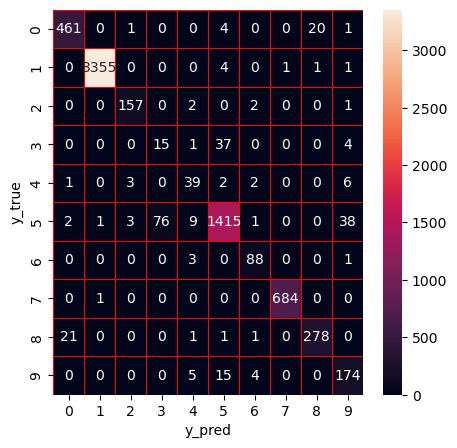

In [17]:
xg = xgb.XGBClassifier(colsample_bytree=1.0, gamma= 0, learning_rate= 0.1, max_depth= 5, n_estimators= 1000)
xg.fit(X_trainf,y_trainf)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()